# Predict Survival on Titanic Datasets Using Classification Methods(Part 2)

## 3. Apply Machine Learning Algorithms
In module 1, I started with exploratory data analysis (EDA) in order to understand the problem and find the hidden information inside each feature. After that I reengineer the existing features to modify them and create new features to better explain the dataset to machine learning model. 

In this module, our goal is to identify the relationship between survived or not(target variable) with other features. Please see the table of content as follows:

### Table of Content
* 3.0 Import Packages
* 3.1 Read Dataset
* 3.2 Dummy Variables Encoding
* 3.3 Feature Normalization(Feature Scaling)
* 3.4 Split Dataset
* 3.5 Introduction of Evaluation Matrics
* 3.6 Machine Learning Methods
* 3.7 Model Comparison
* 3.8 Conclusion

###  3.0 Import Packages

In [151]:
import pandas as pd
from pandas import get_dummies
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression


from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import accuracy_score

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

%matplotlib inline

### 3.1 Read Dataset 

In [152]:
Data = pd.read_csv("Titanic_Data_Preparation.csv") 
TestIndex = pd.read_csv("TestDataIndex.csv",header = None,names=['0','Index'])
Data.shape#1309 x 9
Data.head()

,PassengerId,Age,Embarked,Fare,Pclass,Sex,Survived,Title,NumFamily
0,1,22.0,S,7.2500,3,male,0,Mr,1
1,2,38.0,C,71.2833,1,female,1,Mrs,1
2,3,26.0,S,7.9250,3,female,1,Miss,0
3,4,35.0,S,53.1000,1,female,1,Mrs,1
4,5,35.0,S,8.0500,3,male,0,Mr,0


### 3.2 Dummy Variables Encoding
As we can see above, there are several categorical variables which are stored as text values, including column 'Sex' (male, female), 'Embarked' (S, C, Q) and 'Title' (Mr, Mrs, Miss, Master, Others). Regardless of what the value is used for, the challenge is determining how to use data in the analysis. As we know, many machine learning algorithms can deal with categorical variables without any manipulation but there are also some algorithms cannot do. How to turn these text attributes into numarics for further processing? Read http://pbpython.com/categorical-encoding.html if you want to know more methods about dealing with categorical variables.

At the beginning, we may think of converting categorical variables into ordinal numbers, however, categorical variables cannot tell us which levels should be more important than others, but ordinal numbers can. I think this method will make algorithms bias. 

In order to unify our data and easy to do comparison based on the ML results, we will create dummy variables to convert each category value into a new column and assigns a 1 or 0 (True/False) value to the column. This has the benefit of not weighting a value improperly but does have the downside of adding more columns to the data set. To avoid multicolinearity (Dummy Variable Trap), I plan to remove the first dummy variables of all categorical variables, such as 'Sex_female', 'Title_Master' and 'Embarked_C'

In [153]:
Data0.head()

,PassengerId,Age,Fare,Survived,NumFamily,Sex_female,Sex_male,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Others,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3
0,1,22.0,7.2500,0,1,0,1,0,0,1,0,0,0,0,1,0,0,1
1,2,38.0,71.2833,1,1,1,0,0,0,0,1,0,1,0,0,1,0,0
2,3,26.0,7.9250,1,0,1,0,0,1,0,0,0,0,0,1,0,0,1
3,4,35.0,53.1000,1,1,1,0,0,0,0,1,0,0,0,1,1,0,0
4,5,35.0,8.0500,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1


In [154]:
Data0 = pd.get_dummies(Data,columns = ['Sex','Title','Embarked','Pclass'])
Data1 = Data0.drop(['Sex_female', 'Title_Master', 'Embarked_C','Pclass_1'],axis = 1)
Data1.head()

,PassengerId,Age,Fare,Survived,NumFamily,Sex_male,Title_Miss,Title_Mr,Title_Mrs,Title_Others,Embarked_Q,Embarked_S,Pclass_2,Pclass_3
0,1,22.0,7.2500,0,1,1,0,1,0,0,0,1,0,1
1,2,38.0,71.2833,1,1,0,0,0,1,0,0,0,0,0
2,3,26.0,7.9250,1,0,0,1,0,0,0,0,1,0,1
3,4,35.0,53.1000,1,1,0,0,0,1,0,0,1,0,0
4,5,35.0,8.0500,0,0,1,0,1,0,0,0,1,0,1


### 3.3 Feature Normalization(Feature Scaling)
We also notice there are some features are in different scales, such as column 'Age' and 'Fare'. These two features are numerical variables. When we apply ML methods like KNN, SVM, Neural Networks, etc. different scales of input features may give different contributions to the ML algorithms and then cause problems. So transform the input features into same scale is necessary. We may consider to use mean-std normalization 
<img src = "normalized.png" width = 280>
or min-max normalization
<img src = "minmax.png" width = 340>
as follows:

In [156]:
Data2 = Data1.copy()
#Data2.Age=(Data2.Age-Data2.Age.mean())/Data2.Age.std()
#Data2.Fare=(Data2.Fare-Data2.Fare.mean())/Data2.Fare.std()
Data2.Age=(Data2.Age-Data2.Age.min())/(Data2.Age.max()-Data2.Age.min())
Data2.Fare=(Data2.Fare-Data2.Fare.min())/(Data2.Fare.max()-Data2.Fare.min())

Data2.head()

,PassengerId,Age,Fare,Survived,NumFamily,Sex_male,Title_Miss,Title_Mr,Title_Mrs,Title_Others,Embarked_Q,Embarked_S,Pclass_2,Pclass_3
0,1,0.273456,0.014151,0,1,1,0,1,0,0,0,1,0,1
1,2,0.473882,0.139136,1,1,0,0,0,1,0,0,0,0,0
2,3,0.323563,0.015469,1,0,0,1,0,0,0,0,1,0,1
3,4,0.436302,0.103644,1,1,0,0,0,1,0,0,1,0,0
4,5,0.436302,0.015713,0,0,1,0,1,0,0,0,1,0,1


### 3.4 Split Dataset

In module 1, we did explanatory data analysis on whole dataset. Since the dataset is ready now, we will split the dataset, train models use a number of machine learning algorithms on train set and do evaluation & model comparison to find the optimal algorithm based on evaluation metric scores on test set. 

In [159]:
Testlist = TestIndex.Index.tolist()
Train = Data2.loc[~Data2.PassengerId.isin(Testlist)]
Test = Data2.loc[Data2.PassengerId.isin(Testlist)]
print('Dimension of trainset is',Train.shape)#891 x 14
print('Dimension of testset is: ',Test.shape)#418 x 14
Train.dtypes.index

Dimension of trainset is (891, 14)
Dimension of testset is:  (418, 14)


Index(['PassengerId', 'Age', 'Fare', 'Survived', 'NumFamily', 'Sex_male',
       'Title_Miss', 'Title_Mr', 'Title_Mrs', 'Title_Others', 'Embarked_Q',
       'Embarked_S', 'Pclass_2', 'Pclass_3'],
      dtype='object')

In [160]:
Train_y = Train.Survived
Train_X = Train[[ 'Age', 'Fare', 'NumFamily', 'Sex_male',
                 'Title_Miss', 'Title_Mr', 'Title_Mrs', 'Title_Others', 'Embarked_Q',
                 'Embarked_S', 'Pclass_2', 'Pclass_3']]
#Train_X = Train[['PassengerId', 'Age', 'Fare', 'NumFamily', 'Sex_male', 'Title_Miss','Title_Mr', 'Title_Mrs', 'Title_Others','Embarked_Q', 'Embarked_S', 'Pclass_2', 'Pclass_3']]
Test_y = Test.Survived
Test_X = Test[['Age', 'Fare', 'NumFamily', 'Sex_male',
                 'Title_Miss', 'Title_Mr', 'Title_Mrs', 'Title_Others', 'Embarked_Q',
                 'Embarked_S', 'Pclass_2', 'Pclass_3']]

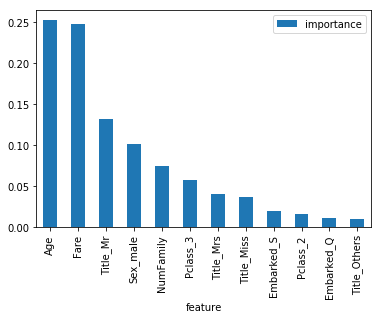

In [169]:
import numpy as np
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(Train_X, Train_y)

Y_prediction = random_forest.predict(Test_X)

importances = pd.DataFrame({'feature':Train_X.columns,'importance':np.round(random_forest.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
importances.plot.bar()

### 3.5 Introduction of Evaluation Matrics
Before using multiple ML algorithms, let's talk about Evaluation Matrics in advance. How to define how effective an algorithm is? If it is hard to understand, maybe we can think about a simple question: How to tell if a restaurant is a good one. Are we judging the restaurants on the basis of their hotpot? Sushi? Ramen? Service? Or even In-store decoration?

This is what metrics do. As we know, Machine Learning algorithms work on constructive feedback principle. If we apply ML algorithms, get feedback from the metrics, make improvement(try other tuning parameters) and continue until you achieve a desirable criterion. We use evaluation matrics to explain the performance of an algorithm. Different performance metrics are used to evaluate different machine learning algorithms. In House Sale in King County project, as it is a regression problem, we use RMSE as metric. Titanic Survival project is a binary classification problem, so we will implement some other type of metrics, such as **Confusion Matrix**, **Accuracy**, **Specificity**, **Sensitivity**,  **Precision-Recall**, **F1-score**, **ROC-AUC**, etc.

<img src = "confusionmatrix.png" width = 550>

In classification problem, after prediction, we can compare the predicted labels with the true labels to see whether our prediction is accurate or not. **Confusion Matrix** is one of the most intuitive and easiest metrics used for finding the correctness and accuracy of the model. The Confusion matrix itself is not a performance measure, but almost all of the performance metrics are based on Confusion Matrix and the numbers inside. 

**True Positives** are the cases when the actual class of the data point was True and the predicted is also True. **True Nagetives** are the cases when the actual class of data was False and the predicted is also Flase. **False Positives** are the cases when the actual class of the data point was False and the predicted is True. **False Negatives** are the cases when the actual class of data was True and the predicted is False.

Besides, there are some other matrics based on confusion matrix:

* **False Positive Rate** (Type I Error): b/(b+d), 
* **False Negative Rate** (Type II Error): c/(a+c),
* **Specificity** (True Negative RATE): Number of items correctly identified as negative out of total negatives
**Specificity** = d/(b+d) = 1 - Recall
* **Sensitivity** (True Positive Rate/Recall): Number of items correctly identified as positive out of total true positives
**Sensitivity** = a/(a+c)
* **Accuracy**: Percentage of total items classified correctly
**Accuracy** = (a+d)/(a+b+c+d)
* **Precision**:  Number of items correctly identified as positive out of total items identified as positive
**Precision** = a/(a+b)
* **Recall**: Number of items correctly identified as positive out of total true positives
**Recall** = a/(a+c)
* **F1-score**: A harmonic mean of precision and recall
**F1** = 2*Precision*Recall/(Precision + Recall)
* **ROC-AUC** ROC(receiver operating characteristic) curve a plot which illustrates the diagnostic ability of a classification algorithm at different classification thresholds. X axis is false positive(sensitivity) rate and y axis is true positive rate(1-specificity). ROC-AUC measures the entire two-dimensional area underneath the entire ROC curve  from (0,0) to (1,1). AUC larger, the algorithm predict better.

<img src = "ROCAUC.png" width = 350>

So many different metrics listed above. **When to use what. It may be a problem we need to talk about.**

##### False Positive/False Negative:
We know that there will be some error associated with every model that we used for predicting the true class of target variable. This will result in False Positive and False Nagetive. It depends on different needs of the problem to determine which one should be minimized.

(1) Missing a cancer patient will be a huge mistake. If we want to correctly identify all cancerous patients from people, in order to catch all cancer cases, minimize FALSE NAGETIVE is necessary. 

(2) However, if we want to classify whether an email is spam or not, it seems worse to classify a important email to spam than classify a spam email as important. In this situation, minimize FALSI POSITIVE is nice.

##### Accuracy
Accuracy is a good measure when the target variable classes are nearly balanced. **But if target variable is not quite balanced, accuracy will not be a good metric.** For example, if we want to detect survival from 100 people and find only 5 are survived from Titanic disaster. Even though the model is terrible enough, all people are labeled as 'non-cancerous', the accuracy is still 95% high. In this situation, accuracy is not a good metric.

##### ROC-AUC
Similar as accuracy, ROC-AUC is also a good measure when the target variable classes are nearly balanced. **But if target variable is not quite balanced, it will not be a good metric either.** Here is a kaggle example: https://www.kaggle.com/lct14558/imbalanced-data-why-you-should-not-use-roc-curve. To solve this problem, we can use Precision-Recall AUC instead of ROC-AUC.

##### Precision and Recall
Precision is a measure which tells us what proportion of people we predict as survived, acurally survived. Precision gives us information about performance with respect to false positive. if we want to minimize False Positive, make precision close to 100%.

Recall is a measure which returns what proportion of truly survived people was predicted by the algprithm as survived. Recall gives us information about a classifier's performance with respect to false negative. If we focus more on minimizing False Negative, we want recall close to 100%.

The precision-recall plot is shown as follows:

<img src = "PRAUC.png" width = 250>

**Comparing with ROC curve, precision-recall curve seems not effected much by inbalanced target variable.** Please see a comparison example in https://www.kaggle.com/general/7517#post41179.

<img src = "PRAUCexample.png" width = 650>

##### F1-score
We use a balanced mean which is called harmonic mean to combine precision and recall together. Harmonic mean is a kind of an average when x and y are equal. But if x and y are different, marmonic mean returns a smaller one, giving the model an appropriate score rather than just an arithmetric mean.

<img src = "harmonic.png" width = 180>

We usually use both PR-AUC and F1-score when the target variable is inbalanced.

In our Titanic project, which metric should we use? Let's check the balance of column 'Survived' at first:

In [162]:
print(Train_y.value_counts())
print('Column Survived is balanced in train set')

0    549
1    342
Name: Survived, dtype: int64
Column Survived is balanced in train set


In [163]:
print(Test_y.value_counts())
print('Column Survived is balanced in test set')

0    266
1    152
Name: Survived, dtype: int64
Column Survived is balanced in test set


As 'Survived' is balanced in Titanic dataset, accuracy will be a good choice.

### 3.6 Machine Learning Methods

Since the problem we are trying to solve is a classification problem. We are going to use bunch of classification algorithms to get the best prediction. I will use the following models and describe them along the way to give a better perspective.
<img src = "Classification.png" width = 500>

#### 3.6.1 Naive Bayes
Naive Bayes algorithm is a simple but effective algorithm for classification based on Bayes' Theorem with an assumption of independence among predictor features. Given a new vector of features, our goal is to classify whether a passenger could be surveved or not, i.e. P(Survival|f1, ..., fn). We apply bayes law(equation 1) as follows:
<img src = "bayeslaw.png" width = 350>
As P(Survival) is easy to calculate, and P(f1, ..., fn) is not related to 'Survived', we only need to consider P(f1, ..., fn | Survival). Applying Maximum Likelihood Estimation(MLE) to solve the problem, we have to choose 'Survival' value(0/1) for which P(f1, ..., fn|Survival) is the highest. Please see the equation 2:

<img src = "bayeslaw0.png" width = 280>
Using conditional probability formula and the independent assumption, we have equation 3:
<img src = "bayeslaw2.png" width = 400>

Well, a problem is coming: How to model the probability function P(fi|Survived)? 
* If fi is continous feature, it follows Gaussian(Normal) Distribution. 
* If fi is discrete feature, it follows Nultinomial Distribution.
* If fi is binary feature, it follows Bernoulli Distribution.

Combining the Distribitons together, let's partially differentiate the above equation 3 with respect to the parameters such as mean and std. In order to find maximum likelihood estimators let’s equal above value to 0, then we will calculate the parameters. We do prediction and calculate the probability of Survival given a vector of features after that.

In our Titanic project, we fit a naive bayes model in train dataset, do prediction, set a threshold to classify the probability into 0 or 1 and calculate evaluation metrics in test set. BEFORE these steps, the first thing is to double check the assumption of naive bayes: **Feature Independence**

To check multicolinearity, we choose VIF(variance inflation factor) score and drop variables whose is more than 5:

In [164]:
# Check Multicolinearity BY VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor    

def calculate_vif_(X, thresh=5.0):
    variables = list(range(X.shape[1]))
    dropped = True
    while dropped:
        dropped = False
        vif = [variance_inflation_factor(X.iloc[:, variables].values, ix)
               for ix in range(X.iloc[:, variables].shape[1])]
        maxloc = vif.index(max(vif))
        if max(vif) > thresh:
            print('dropping \'' + X.iloc[:, variables].columns[maxloc] +
                  '\' at index: ' + str(maxloc))
            del variables[maxloc]
            dropped = True
    print('Remaining variables:')
    print(X.columns[variables])
    return X.iloc[:, variables]

In [165]:
Train_X1 = calculate_vif_(Train_X)
Train_X1.head()

dropping 'Sex_male' at index: 3
dropping 'Title_Mr' at index: 4
Remaining variables:
Index(['Age', 'Fare', 'NumFamily', 'Title_Miss', 'Title_Mrs', 'Title_Others',
       'Embarked_Q', 'Embarked_S', 'Pclass_2', 'Pclass_3'],
      dtype='object')


,Age,Fare,NumFamily,Title_Miss,Title_Mrs,Title_Others,Embarked_Q,Embarked_S,Pclass_2,Pclass_3
0,0.273456,0.014151,1,0,0,0,0,1,0,1
1,0.473882,0.139136,1,0,1,0,0,0,0,0
2,0.323563,0.015469,0,1,0,0,0,1,0,1
3,0.436302,0.103644,1,0,1,0,0,1,0,0
4,0.436302,0.015713,0,0,0,0,0,1,0,1


In [166]:
Test_X1 = Test_X.drop(['Sex_male','Title_Mr'],axis = 1)
Test_X1.head()

,Age,Fare,NumFamily,Title_Miss,Title_Mrs,Title_Others,Embarked_Q,Embarked_S,Pclass_2,Pclass_3
891,0.430039,0.015282,0,0,0,0,1,0,0,1
892,0.586622,0.013663,1,0,1,0,0,1,0,1
893,0.774521,0.018909,0,0,0,0,1,0,1,0
894,0.336089,0.016908,0,0,0,0,0,1,0,1
895,0.273456,0.023984,2,0,1,0,0,1,0,1


In [180]:
# Gaussian Naive Bayes
gaussian = GaussianNB()
gaussian.fit(Train_X1, Train_y)
y_pred = gaussian.predict(Test_X1)
gaussianNB_accy = round(accuracy_score(y_pred, Test_y), 3)
print('Confusion Matrix: ')
print( confusion_matrix(Test_y, y_pred))
print('-----------------------------------------------------------')
print("Precision: ", round(precision_score(Test_y, y_pred),2))
print('-----------------------------------------------------------')
print("Recall: ",round(recall_score(Test_y, y_pred),2))
print('-----------------------------------------------------------')
print("Accuracy: ",round(gaussianNB_accy * 100,2),'%')
print('-----------------------------------------------------------')
print('F1 Score: ',round(f1_score(Test_y, y_pred),2))

Confusion Matrix: 
[[245  21]
 [  6 146]]
-----------------------------------------------------------
Precision:  0.87
-----------------------------------------------------------
Recall:  0.96
-----------------------------------------------------------
Accuracy:  93.5 %
-----------------------------------------------------------
F1 Score:  0.92


Wow! Naive Bayes classification performs well with an accuracy of 0.935. 

Usually, Naive Bayes is an easy, fast and simple to implement classification method and works well for small data, Naive Bayes also performs well even if the Naive Assumption is not perfectly met. This the reason why it is always be used as a baseline during model comparison. 

However, when we use Naive Bayes, we need to remove correlated features in advance to avoid multicolinearity. If a categorical variable has a category in test data set which was not observed in training data set, then the model will assign a zero probability. It will not be able to make a prediction. This is often known as “Zero Frequency”. To solve this, we can use the smoothing technique. One of the simplest smoothing techniques is called Laplace estimation. Sklearn applies Laplace smoothing by default when you train a Naive Bayes classifier.

 

https://blog.sicara.com/naive-bayes-classifier-sklearn-python-example-tips-42d100429e44

https://towardsdatascience.com/bayes-classifier-with-maximum-likelihood-estimation-4b754b641488

#### 3.6.1 Decision Tree
